<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [3]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [5]:
# Import 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import svm


In [6]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3, stratify=y)

linear  kernel train acc:  0.5359907120743034  test acc:  0.539829853054911
linear  kernel train acc:  0.5359907120743034  test acc:  0.5421500386697602
linear  kernel train acc:  0.5381191950464397  test acc:  0.5436968290796597
linear  kernel train acc:  0.5359907120743034  test acc:  0.5413766434648105
linear  kernel train acc:  0.5361842105263158  test acc:  0.5367362722351121
linear  kernel train acc:  0.5356037151702786  test acc:  0.5359628770301624
linear  kernel train acc:  0.5325077399380805  test acc:  0.5320959010054138
linear  kernel train acc:  0.5319272445820433  test acc:  0.5282289249806651
linear  kernel train acc:  0.5224458204334366  test acc:  0.5174013921113689
linear  kernel train acc:  0.5178018575851393  test acc:  0.5189481825212684


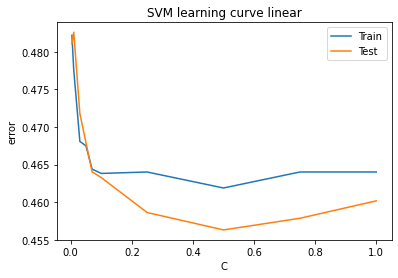

rbf  kernel train acc:  0.44040247678018574  test acc:  0.43464810518174785
rbf  kernel train acc:  0.44001547987616096  test acc:  0.4354215003866976
rbf  kernel train acc:  0.43808049535603716  test acc:  0.4377416860015468
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4354215003866976
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473
rbf  kernel train acc:  0.43653250773993807  test acc:  0.4361948955916473


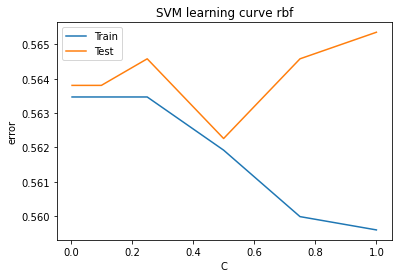

poly  kernel train acc:  0.44020897832817335  test acc:  0.43696829079659705
poly  kernel train acc:  0.44001547987616096  test acc:  0.43464810518174785
poly  kernel train acc:  0.43962848297213625  test acc:  0.43696829079659705
poly  kernel train acc:  0.4361455108359133  test acc:  0.4385150812064965
poly  kernel train acc:  0.4373065015479876  test acc:  0.4361948955916473
poly  kernel train acc:  0.4371130030959752  test acc:  0.4361948955916473
poly  kernel train acc:  0.43691950464396284  test acc:  0.4361948955916473
poly  kernel train acc:  0.43691950464396284  test acc:  0.4361948955916473
poly  kernel train acc:  0.43672600619195046  test acc:  0.4361948955916473
poly  kernel train acc:  0.43672600619195046  test acc:  0.4361948955916473


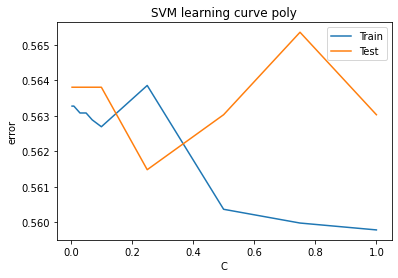

In [7]:
#Loop through the different kernels
kernels = ['linear', 'rbf', 'poly']
Cs = [1, 0.75, 0.5, 0.25, 0.1, 0.07, 0.05, 0.03, 0.01, 0.004]

for mykernel in kernels:
   #optional soft margin parameter ; soft margin = 1 means no soft margin.
   train_acc=[]
   test_acc=[]
   train_err=[]
   test_err=[]
   for i in range(len(Cs)):
      #Create SVM classifer object
      model = svm.SVC(kernel=mykernel, decision_function_shape='ovo', C=Cs[i])
      # Train SVM Classifer
      model = model.fit(x_train,y_train)

      #print results
      train_acc.append(metrics.accuracy_score(y_train,  model.predict(x_train)))
      test_acc.append(metrics.accuracy_score(y_test,  model.predict(x_test)))
      train_err.append(1-train_acc[i])
      test_err.append(1-test_acc[i])
      print(mykernel," kernel train acc: ", train_acc[i], " test acc: ", test_acc[i])

   #plot results
   pyplot.plot(Cs, train_err, label='Train')
   pyplot.plot(Cs, test_err, label='Test')
   pyplot.title('SVM learning curve '+mykernel )
   pyplot.ylabel('error')
   pyplot.xlabel('C')
   pyplot.legend(loc='best')
   pyplot.show()
